In [0]:
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import pandas as pd

import random
import tensorflow
import keras
from sklearn import metrics
!pip install peakutils
import peakutils
from sklearn.utils import shuffle
import tensorflow as tf
from scipy.interpolate import *
from scipy.signal import *

In [0]:
! git clone https://github.com/vishnurmurthy/Myocardial_Ischemia_Detection

Cloning into 'Myocardial_Ischemia_Detection'...
remote: Counting objects: 1021, done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 1021 (delta 13), reused 13 (delta 3), pack-reused 984
Receiving objects: 100% (1021/1021), 498.64 MiB | 30.37 MiB/s, done.
Resolving deltas: 100% (122/122), done.
Checking out files: 100% (591/591), done.


In [0]:
large_data = pd.DataFrame({"Signal":[], "Label":[]})
large_data

,Label,Signal


In [0]:

datafiles = ['s20011.xz','s20131.xz','s20251.xz','s20341.xz','s20471.xz','s20591.xz','s30721.xz','s20021.xz','s20141.xz',
's20351.xz','s20481.xz','s20601.xz','s30731.xz','s20031.xz','s20151.xz','s20271.xz','s20361.xz','s20491.xz','s20621.xz',
's20272.xz','s20371.xz','s20501.xz','s20431.xz','s20551.xz','s20181.xz','s30661.xz','s20301.xz','s20231.xz','s20321.xz',
's20631.xz','s30741.xz','s20051.xz','s20171.xz','s20273.xz','s20381.xz','s20511.xz','s20641.xz','s30742.xz','s20061.xz',
's20274.xz','s20391.xz','s20521.xz','s20651.xz','s30751.xz','s20071.xz','s20191.xz','s20281.xz','s20401.xz','s20531.xz',
's30752.xz','s20081.xz','s20201.xz','s20291.xz','s20411.xz','s20541.xz','s30671.xz','s30761.xz','s20091.xz','s20211.xz',
's30681.xz','s30771.xz','s20101.xz','s20221.xz','s20311.xz','s20441.xz','s20561.xz','s30691.xz','s30781.xz','s20111.xz',
's20451.xz','s20571.xz','s30701.xz','s30791.xz','s20121.xz','s20241.xz','s20331.xz','s20461.xz','s20581.xz','s30711.xz', 
's30732.xz','s20041.xz','s20161.xz','s30801.xz', 's20261.xz',]
os.chdir('Myocardial_Ischemia_Detection/processed_data/')
for i in datafiles:
  dat = pd.read_pickle(i)
  large_data = large_data.append(dat)
os.chdir('../..')
print(large_data)

        Label                                             Signal
0        rtst  [-0.23499999999999996, 0.6729999999999999, 2.1...
1        rtst  [0.305, 0.021000000000000005, -0.197, -0.28500...
2        rtst  [-0.183, -0.2, -0.197, 0.04300000000000002, 1....
3        rtst  [-0.291, -0.33199999999999996, -0.339999999999...
4        rtst  [-0.037, -0.028999999999999998, -0.13, -0.2280...
5        rtst  [-0.05, 1.275, 1.8809999999999998, 0.088999999...
6        rtst  [-0.335, -0.31599999999999995, -0.302, -0.2879...
7        rtst  [-0.198, -0.10800000000000001, -0.052000000000...
8        rtst  [-0.151, -0.17099999999999999, -0.216000000000...
9        rtst  [-0.135, -0.258, -0.3, -0.306, -0.311, -0.275,...
10       rtst  [-0.20600000000000002, -0.207, -0.205, -0.198,...
11       rtst  [0.242, -0.017, -0.183, -0.24299999999999997, ...
12       rtst  [-0.045, -0.119, -0.2, -0.285, -0.268000000000...
13       rtst  [-0.182, 1.013, 2.053, 0.20399999999999996, -0...
14       rtst  [-0.172000

In [0]:
print("# of data rows for ST: ", len(large_data.loc[large_data['Label'] == 'st']))
print("# of data rows for RTST: ", len(large_data.loc[large_data['Label'] == 'rtst']))
print("# of data rows for Normal: ", len(large_data.loc[large_data['Label'] == 'normal']))
print("# of data rows for SCCST: ", len(large_data.loc[large_data['Label'] == 'sccst']))
print("# of data rows for SST: ", len(large_data.loc[large_data['Label'] == 'sst']))

print('\n')
large_data = large_data[large_data.Label != 'scct'] #dropping rows with shifts, we are not classifying
large_data = large_data[large_data.Label != 'sst']

large_data['Label'] = large_data['Label'].map({'st': 0, 'rtst': 1, 'normal': 2})

print("# of data rows for ST: ", len(large_data.loc[large_data['Label'] == 0]))
print("# of data rows for RTST: ", len(large_data.loc[large_data['Label'] == 1]))
print("# of data rows for Normal: ", len(large_data.loc[large_data['Label'] == 2]))

newx = 0
for i in large_data['Signal']:
	if len(i)!= 250:
		print(len(i))
		newx+=1
print("nx", newx)

# of data rows for ST:  298287
# of data rows for RTST:  86628
# of data rows for Normal:  290985
# of data rows for SCCST:  505
# of data rows for SST:  746


# of data rows for ST:  298287
# of data rows for RTST:  86628
# of data rows for Normal:  290985
nx 0


In [0]:
#convert to ints

large_data['Label'] = large_data['Label'].astype('category').cat.codes

#randomly shuffle dataframe

large_data = large_data.sample(frac=1).reset_index(drop=True)

large_data

,Label,Signal
0,0,"[-0.197, -0.085, -0.046, -0.05, -0.04300000000..."
1,2,"[-0.02, 0.01, 0.02, 0.037, 0.05, 0.065, 0.087,..."
2,1,"[-0.27199999999999996, -0.199, -0.138999999999..."
3,0,"[0.15499999999999997, 0.354, 0.48, 0.385, 0.18..."
4,2,"[-0.072, -0.355, -0.231, -0.339, -0.328, -0.04..."
5,2,"[0.3, 0.364, 0.4069999999999999, 0.384, 0.272,..."
6,2,"[-0.06, -0.032, -0.014000000000000002, 0.01400..."
7,2,"[0.11299999999999999, 0.11299999999999999, 0.0..."
8,2,"[-0.05700000000000001, -0.10600000000000001, 0..."
9,1,"[-0.11200000000000002, -0.11499999999999999, -..."


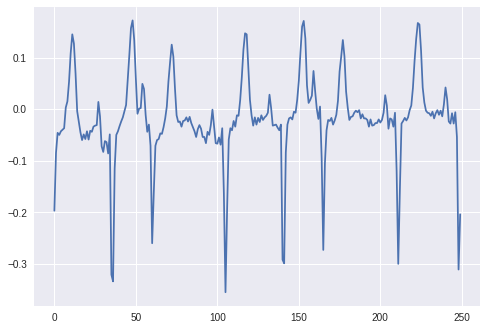

In [0]:
plt.plot(np.arange(0, 250), large_data['Signal'][0])

In [0]:
'''
# Run ONLY if you have a lot of GPU, takes a while. I tried and I couldn't get it to finish

LEN = large_data.shape[0]

import time

for i in range(LEN):
  start = time.time()
  large_data['Signal'][i] = large_data['Signal'][i] / max(abs(large_data['Signal'][i]))
  print(time.time() - start)
'''

In [0]:
y, X = large_data['Label'].values, large_data['Signal'].values

print(y)
print(X)

In [0]:

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)

In [0]:
y_train = tf.keras.utils.to_categorical(y_train[0], 3)
y_train = y_train.astype(np.float32)
y_val = tf.keras.utils.to_categorical(y_val[0], 3)
y_val = y_val.astype(np.float32)

In [0]:
X_train = X_train.astype(np.float32)
X_val = y_val.astype(np.float32)

In [0]:
print("Training")
print(X_train.shape, y_train.shape, '\n\n', X_train, '\n\n', y_train)
print("Validatoin")
print(X_val.shape, y_val.shape, '\n\n', X_val, '\n\n', y_val)

In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(128, activation='relu', input_shape = (4000, 11)))
model.add(tf.keras.layers.GaussianDropout(.25))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.GaussianDropout(.25))
model.add(tf.keras.layers.Dense(129, activation='relu'))
model.add(tf.keras.layers.GaussianDropout(.25))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.GaussianDropout(.25))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=tf.train.AdamOptimizer(learning_rate=0.001), metrics=['accuracy'])
model.summary()

In [0]:
model.fit(X_train, y_train, validation_data = (X_val, y_val), verbose = True, metrics = 'accuracy')